<a href="https://colab.research.google.com/github/naveen09peesari/AIML_1339/blob/main/aiml10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


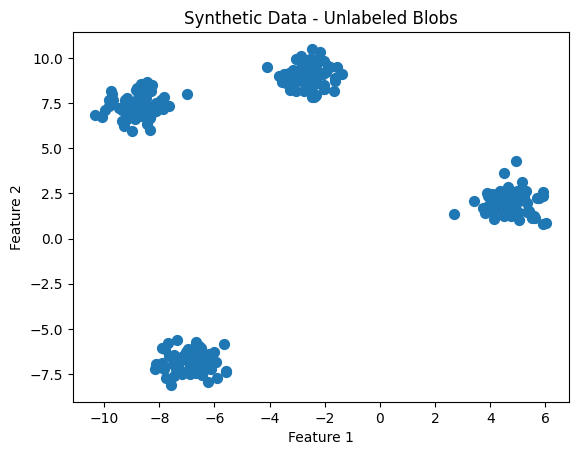

In [3]:

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data - Unlabeled Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_
centers = kmeans.cluster_centers_


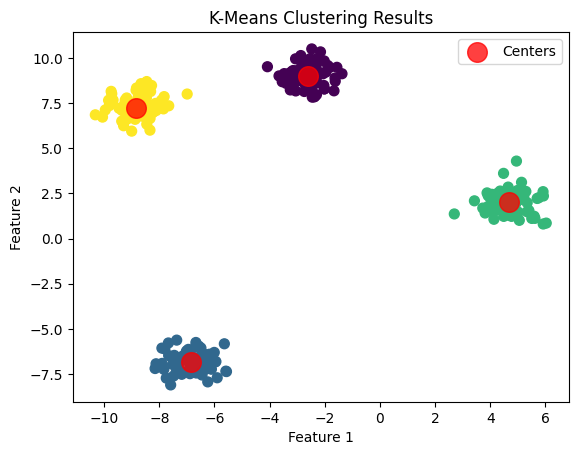

In [5]:

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels


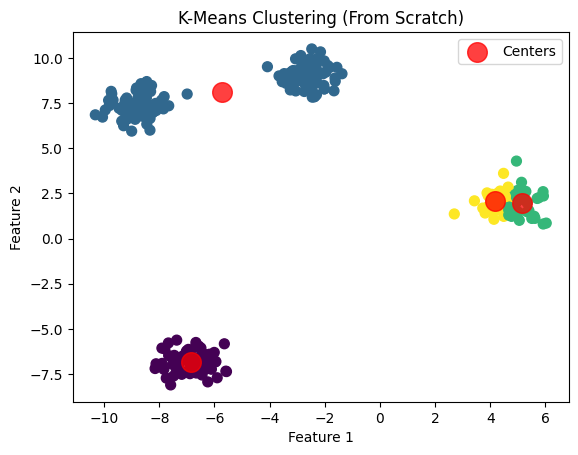

In [7]:
centers, labels = find_clusters(X, 4)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')
plt.title("K-Means Clustering (From Scratch)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


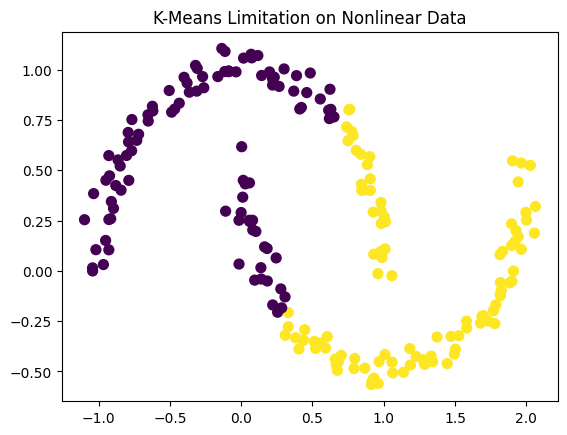

In [8]:
from sklearn.datasets import make_moons

# Create nonlinear dataset
X, y = make_moons(200, noise=0.05, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("K-Means Limitation on Nonlinear Data")
plt.show()
